In [167]:
# Sharing System -Part II:  Building Predictive Models 

# import the necessary packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
import csv
from os import system
import pandas as pd
from pandas import DataFrame
import shutil, glob
from sklearn import tree
from sklearn.metrics import confusion_matrix


In [168]:
# After downloading the train.csv and test.csv files, we are reading the two files in DataFrames

path='F:/dataprojects'

In [169]:
df = pd.read_csv('F:/dataprojects/train.csv')
dftest=pd.read_csv('F:/dataprojects/test.csv')

In [170]:
features = list(df.columns[:6])
print features

['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp']


In [171]:
# In my case, there where some problems with identifying the 'count' column of the DataFrame, so we renamed it
#Rename the last column of the DataFrame
df.rename(columns={'count': 'totalcustomers'}, inplace=True)
list(df.columns.values)
list(dftest.columns.values)

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed']

In [172]:
#We want to analyze the bike sharing distribution on hours, days, months, years, 
#so let' regain these informations from the 'datetime' column
df['datetime']=pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour']=df['datetime'].dt.hour
cols = df.columns.tolist()
cols=cols[-4:]+cols[:-4]
df=df[cols]
df=df.drop('datetime', axis=1)
dftest['datetime']=pd.to_datetime(dftest['datetime'])
dftest['year'] = dftest['datetime'].dt.year
dftest['month'] = dftest['datetime'].dt.month
dftest['day'] = dftest['datetime'].dt.day
dftest['hour']=dftest['datetime'].dt.hour
colstest = dftest.columns.tolist()
colstest=colstest[-4:]+colstest[:-4]
dftest=dftest[colstest]
dftest=dftest.drop('datetime', axis=1)
print list(df.columns.values)
print list(dftest.columns.values)


['year', 'month', 'day', 'hour', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'totalcustomers']
['year', 'month', 'day', 'hour', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']


In [173]:
# check if there are any missing values in the DataFrame: in this case there is no missing value in the database
# the isnull() detects missing values in the specified DataFrame df
df.isnull().any()
dftest.isnull().any()
# there are 10886 entries in our dataframe

year          False
month         False
day           False
hour          False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
dtype: bool

In [174]:
# We already noticed some strong correlation values between the variables casual, registered and total customers. 
# Same for temp and atemp and for months and season. 
# So, we drop the columns: casual, registered, atemp and season from our database
df=df.drop('casual', axis=1).drop('registered', axis=1).drop('atemp', axis=1).drop('season', axis=1).drop('day', axis=1).drop('holiday',axis=1).drop('weather',axis=1)
#df=df.drop('year', axis=1)
dftest=dftest.drop('atemp', axis=1).drop('season', axis=1).drop('day', axis=1).drop('holiday',axis=1).drop('weather',axis=1)
#dftest=dftest.drop('year', axis=1)
newdf=df.drop('totalcustomers', axis=1)

In [175]:
target=df.totalcustomers

In [176]:
# Simple linear regression model - Bad approach
# Let us consider a standard linear regreesion model, without taking into account all observation in the exploratory analysis

In [177]:
# Before designing the model, we split the dataset, into a training and a test set
from sklearn.cross_validation import train_test_split
df_training, df_testing,target_training, target_testing = train_test_split(newdf, target, test_size=0.3, random_state=1)


In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [179]:
lm=LinearRegression()

In [180]:
lm.fit(df_training,target_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [181]:
df1=lm.predict(df_training)
df2=lm.predict(df_testing)

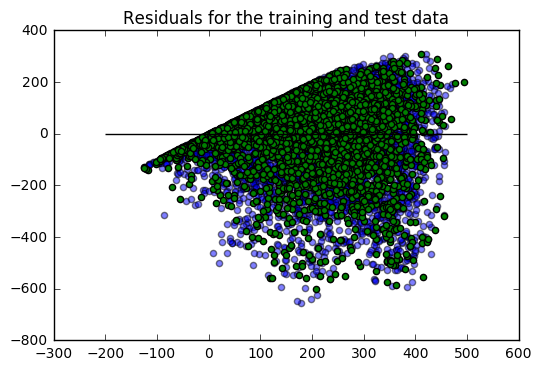

In [182]:
plt.scatter(df1,df1-target_training, c='b', s=20, alpha=0.5)
plt.scatter(df2, df2-target_testing, c='g', s=20)
plt.hlines(y=0, xmin=-200, xmax=500)
plt.title('Residuals for the training and test data')
plt.show()

In [183]:
#r2_score  compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis).
#The chosen model here fits worse than a horizontal line, i.e. it has negative values.  
# The model does not follow the trend of the data.

In [184]:
r2_score(df2, target_testing)

-0.55996392976316978

In [185]:
r2_score(df1,target_training)

-0.61380908242707255

In [186]:
# We remarked in Part I that there are a lot of outliers while plotting the count of registered and casual users. 
#These values are not generated due to error, so we consider them as natural outliers. 
#They might be a result of groups of people taking up cycling (who are not registered). 
#Let's remember how did the totalcustomers boxplot looked like and compare it with the logarithm transformation boxplot


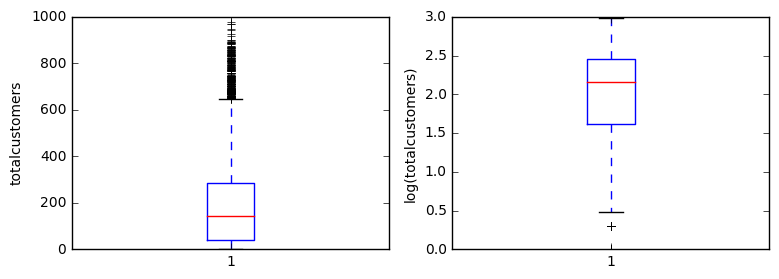

In [187]:
#To treat such outliers, we will use logarithm transformation. Let’s look at the similar plot after log transformation.
fig = plt.figure(figsize=(9, 3))
ax = plt.subplot(1, 2, 1)
ax.boxplot(df.totalcustomers)
ax.set_ylabel('totalcustomers')
ax=plt.subplot(1,2,2)
ax.boxplot(np.log10(df.totalcustomers))
ax.set_ylabel('log(totalcustomers)')
plt.show()

In [188]:
# Let's try a different model

In [189]:
# 1. Decision tree

In [190]:
features = list(df_training.columns[:7])
n=len(features)
dfeatures = pd.DataFrame(np.array(features).reshape(1,n), columns=list(features))

print dfeatures.columns.values

['year' 'month' 'hour' 'workingday' 'temp' 'humidity' 'windspeed']


In [191]:
features_2 = list(df_testing.columns[:7])
n2=len(features_2)
dfeatures2 = pd.DataFrame(np.array(features_2).reshape(1,n2), columns=list(features_2))

print dfeatures2.columns.values

['year' 'month' 'hour' 'workingday' 'temp' 'humidity' 'windspeed']


In [192]:
clf = tree.DecisionTreeClassifier(criterion="gini",  random_state=50, max_depth=20, min_samples_split=2, max_features=n, min_samples_leaf=2)


In [193]:
''' Tunning the parameters in the decision tree algorithm

What is the interpretation of the decision tree?
1. Imagine that all data (all rows) start in a single bin at the top of the tree.
2. All features are considered to see how the data can be split in the most informative way –
this uses the gini measure by default, but this can be changed to entropy if you prefer; 

1.  min_samples_leaf larger, a smaller accuracy. it looks like setting this value to 2, leads to better results 
2. min_samples_split larger, a much smaller accuracy; set this value to 2
3. max_depth small, then the accuracy is much smaller. 
4. The features are always randomly permuted at each split. Therefore, the best found split may vary, 
even with the same training data and max_features=n_features, if the improvement of the criterion 
is identical for several splits enumerated during the search of the best split. 
To obtain a deterministic behaviour during fitting, random_state has to be fixed.
5. criterion: gini versus entropy
Gini(E)=1−∑(p_j)^2
H(E)=−∑p_jlog(p_j).
People say that it does not matter which criterion you are using, the difference is important only in about 2% of cases.
Probably, for decision tree, the best option is gini. The values of these parameters have to be optimeized in order to get the best results.
'''

' Tunning the parameters in the decision tree algorithm\n\nWhat is the interpretation of the decision tree?\n1. Imagine that all data (all rows) start in a single bin at the top of the tree.\n2. All features are considered to see how the data can be split in the most informative way \xe2\x80\x93\nthis uses the gini measure by default, but this can be changed to entropy if you prefer; \n\n1.  min_samples_leaf larger, a smaller accuracy. it looks like setting this value to 2, leads to better results \n2. min_samples_split larger, a much smaller accuracy; set this value to 2\n3. max_depth small, then the accuracy is much smaller. \n4. The features are always randomly permuted at each split. Therefore, the best found split may vary, \neven with the same training data and max_features=n_features, if the improvement of the criterion \nis identical for several splits enumerated during the search of the best split. \nTo obtain a deterministic behaviour during fitting, random_state has to be fi

In [194]:
#target_training=target_training.values
#print target_training

In [195]:
#dfX=df_training.as_matrix(columns=df_training.columns)
#print dfX

In [196]:
dt=clf.fit(df_training, target_training)
dt2=clf.fit(df_testing,target_testing)
#print DataFrame(dt.feature_importances_)
for name, importance in zip(dfeatures.columns.values, dt.feature_importances_):
    print(name, importance)

('year', 0.031587056379592519)
('month', 0.14168688151288805)
('hour', 0.16444063289083119)
('workingday', 0.044338945338462589)
('temp', 0.20719689233206379)
('humidity', 0.22588663939248263)
('windspeed', 0.18486295215367926)


In [197]:
'''
The predictors we considered in our model are year, month, hour per day, temperature, humiditiy and windspeed. 
As we can see, the variable year has a very small importance on the target variable. 
However, if we eliminate this variable, the accurcay becomes lower. 
Does keeping the variable leads to overfitting?
Humidity is in fact the variable that influence the most the target variable.
'''

'\nThe predictors we considered in our model are year, month, hour per day, temperature, humiditiy and windspeed. \nAs we can see, the variable year has a very small importance on the target variable. \nHowever, if we eliminate this variable, the accurcay becomes lower. \nDoes keeping the variable leads to overfitting?\nHumidity is in fact the variable that influence the most the target variable.\n'

In [198]:
#Confusion matrices allow you to view actual value predicted for all class labels.
metrics.confusion_matrix(target_training, clf.predict(df_training))
#print metrics.classification_report(target_training, clf.predict(df_training))

array([[31,  8, 11, ...,  0,  0,  0],
       [30,  9, 17, ...,  0,  0,  0],
       [21, 11, 25, ...,  0,  0,  0],
       ..., 
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [199]:
metrics.confusion_matrix(target_testing, clf.predict(df_testing))
#print metrics.classification_report(target_testing, clf.predict(df_testing))

array([[29,  0,  0, ...,  0,  0,  0],
       [ 2, 29,  0, ...,  0,  0,  0],
       [ 3,  2, 40, ...,  0,  0,  0],
       ..., 
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [200]:
n_nodes = dt.tree_.node_count
children_left = dt.tree_.children_left
children_right = dt.tree_.children_right
feature = dt.tree_.feature
threshold = dt.tree_.threshold

In [201]:
#transforming the decision tree into a graph can be done using graphviz
# it can be easily installed using:  conda install graphviz

import graphviz
tree.export_graphviz(dt, out_file='tree.dot', feature_names=dfeatures.columns.values) 

In [202]:
!dot -Tpng tree.dot > tree.png

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.133149 to fit


In [203]:
from IPython.display import Image
Image(filename='tree.png') 

In [204]:
target_pred=dt.predict(df_testing)
target_pred
#dt.score(X=target_testing, y=target_pred)

array([308,   8, 539, ...,   2,  17, 382], dtype=int64)

In [205]:
print "Accuracy is ", accuracy_score(target_testing,target_pred)*100

Accuracy is  51.1328842621


In [206]:
target_pred2=dt2.predict(dftest)
target_pred2

array([ 15,  10,   1, ..., 120, 115,  53], dtype=int64)

In [207]:
print 'Saving Predictions in file: output.csv\n'

Saving Predictions in file: output.csv



In [208]:
f = open('output.csv', 'w')
open_file_object = csv.writer(f)
open_file_object.writerow(target_pred2)

